In [2]:
# Standard imports
import os
import sys

In [3]:
def get_script_directory():
    try:
        # This will work if the script is run directly
        script_path = os.path.abspath(__file__)
    except NameError:
        # This will work in an interactive environment like Jupyter
        script_path = os.path.abspath('')
    
    return script_path

In [4]:
sys.path.append(r"C:\Geotech_Research\CriticalSoilModels\pumat")

from lib.Load_Classes.Popular_Load_Class import PopularPath
from lib.Driver_Classes.Mod_Driver_Setup import DriverModelSetup
from lib.Driver_Classes.Mod_Driver_Model import DriverModel
from lib.general_functions.executing_runs import generate_batch_script, run_batch_script

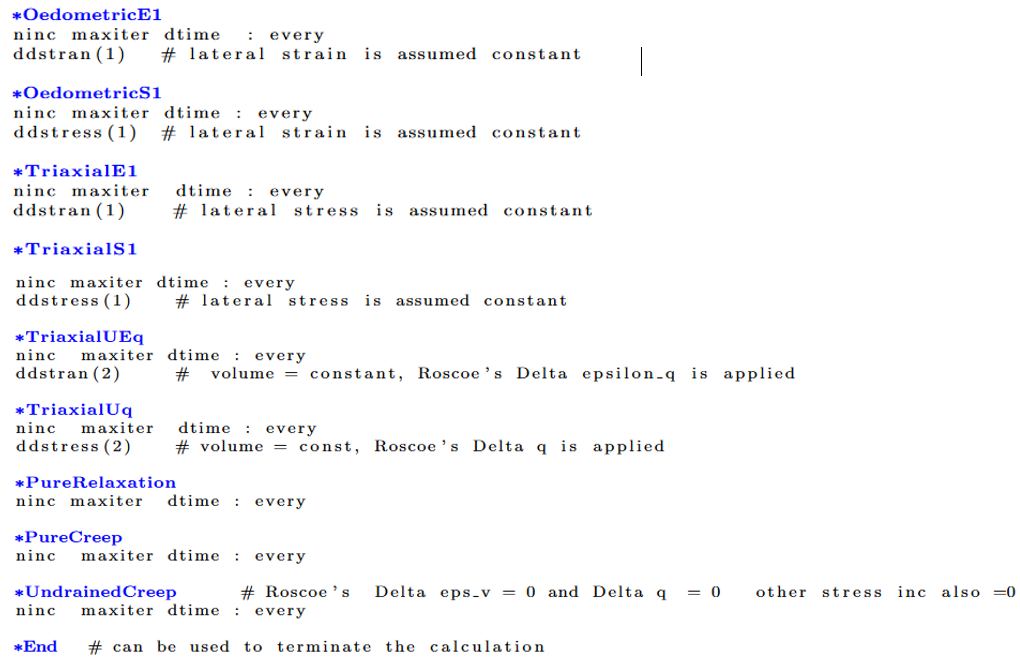

In [5]:
test_name = "TriaxialE1"
load_params = {
    "ninc": 1000,
    "maxiter": 500,
    "dtime"  : 500_000,
    "every"  : 1,
    "ddstran_1": -0.5,
}

# Construct the load using the params and the name of the load
load = PopularPath(test_name, load_params)

loads = [load, load]

In [6]:
# Set the values for the properties
#NOTE: This needs to be in the order that the parameters should be in
properties = {
    "Shear modulus" : 2500,
    "poisson ratio" : 0.2,
    "M_tc"          : 1.0,
    "Nova Vol coeff": 0,
    "D_min"         : 0,
    "h"             : 0,
    "alpha_G"       : 0,
    "alpha_K"       : 0,
    "alpha_D"       : 0,
    "D_part"        : 0,
    "G_s"           : 2.65,
    "inc_eps_ref"   : 0,
    "switch_smooth" : 0,
    "N_s"           : 0,
    # "switch_originl": 0 # Somehow I have an extra one, Doesn't matter for linear

}

In [7]:
# Get the directory that the script is currently running in
folder = get_script_directory()

# Set the name of the executable (Assumes that the exe is local)
exe_name = r"incrementalDriver.exe"

# Make the path for the executable
exe_path = os.path.join(folder, exe_name)

# Init the model object that will contain the functions for initiating 
model = DriverModel(folder, constitutive_model_name= "NAMC", inc_driver_exe_path= exe_path, output_file_name="output.txt")

In [8]:
# Store the generated loads in 
model.setup.store_loads(loads)

In [9]:
print(model.setup)

Constitutive model name: NAMC
Folder path: c:\Geotech_Research\CriticalSoilModels\pumat\4_NAMC_perf_plast


In [10]:

# Set the intial stress condition
stress = [-100, -100, -100, 0, 0, 0]

# Set the intial state parameters condition
state_params = {
    "param_1" : 0, "param_2" : 0,
    "param_3" : 0, "param_4" : 0,
    "param_5" : 0, "param_6" : 0,
    "param_7" : 0, "param_8" : 0,
    "param_9" : 0, "param_10": 0,
    "param_11": 0, "param_12": 0,
    "param_13": 0, "param_14": 0,
    "param_15": 0, "param_16": 0,
    "param_17": 0, "param_18": 0,
    "param_19": 0,
}

# Write the properties file
model.setup.write_parameters_file(properties)

# Write the initial conditions file
model.setup.write_initial_conditions_file(stress, state_params)

# Write all of the loads to the file
model.setup.write_loads()

AttributeError: 'list' object has no attribute 'write'

In [10]:
# Run the model
model.run_model()

Batch file 'c:\Geotech_Research\CriticalSoilModels\pumat\4_NAMC_perf_plast\run_model.bat' executed successfully.


In [11]:
# Print the metadata about the model results
print(model.results)

Output file name: output.txt
Results folder path: c:\Geotech_Research\CriticalSoilModels\pumat\4_NAMC_perf_plast



In [12]:
# Store the output file and sort it into stress, strain, and state parameters dataframes (dfs)
model.results.store_all()

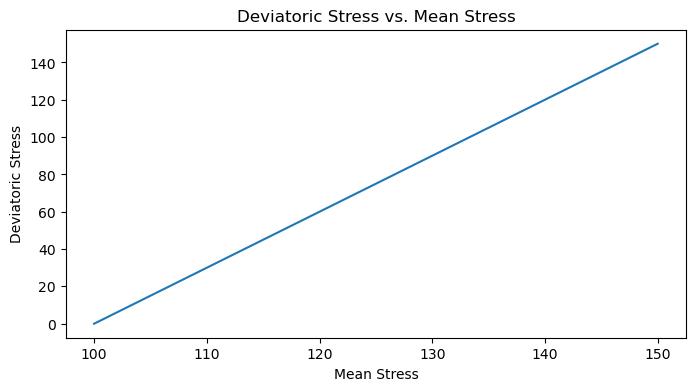

In [13]:
# Plot the q vs. p setting compression to be true
model.results.quick_plot_stress(compression_pos=True)

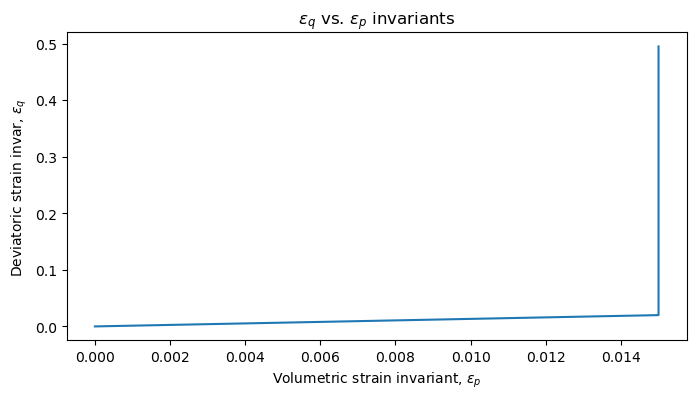

In [14]:
# Plot the strain invariants
model.results.quick_plot_strain(compression_pos=True)

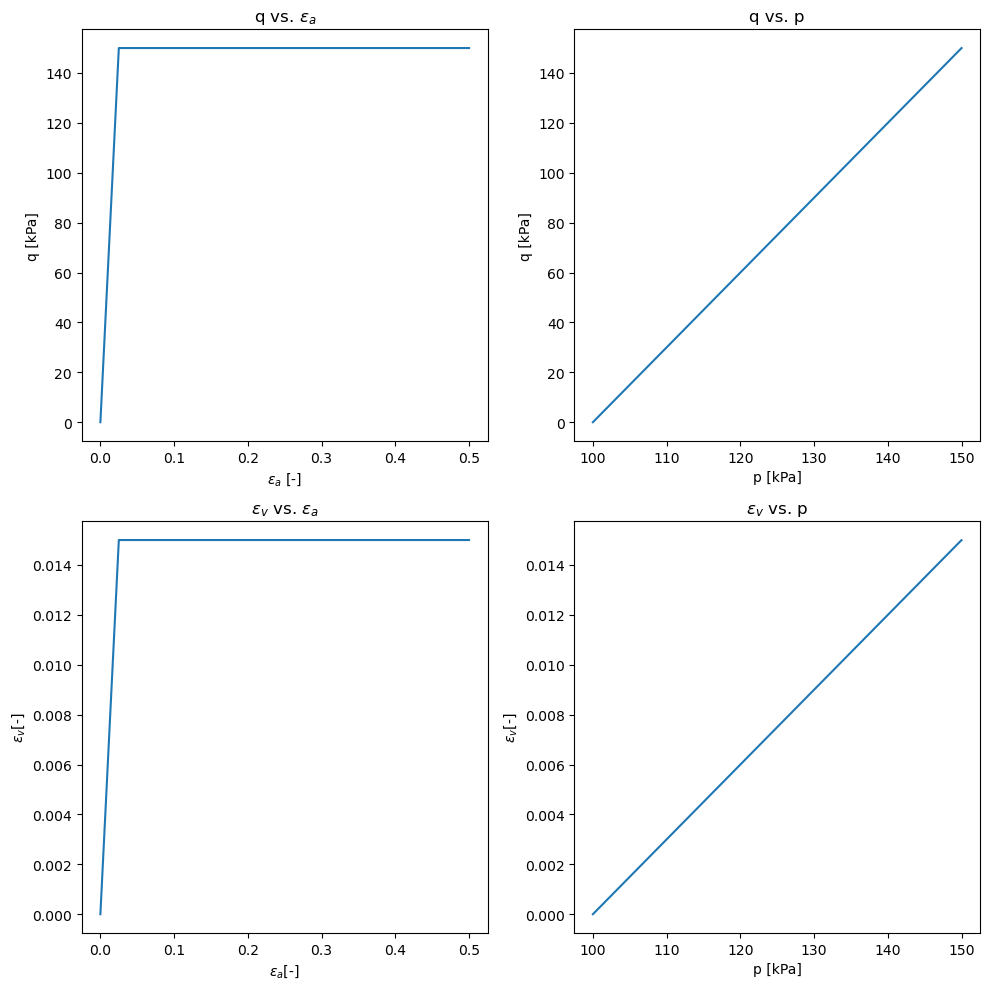

In [15]:
# Plot the quad plot
model.results.quick_quad_plot()